In [ ]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install tidytext
import tidytext
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3871 sha256=c95beeb10a4189c055dd008f1d6686ea85a76dab72f9376399aa6f2a6108a37d
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
victims = pd.read_csv("TRC_Victims__20240216.csv")
victims.head()

,name,age,description,url
0,"AARON, Thabo Simon",22,An ANCYL member who was shot and severely inju...,http://sabctrc.saha.org.za/victims/aaron_thabo...
1,"ABBOTT, Montaigne",23,A member of the SADF who was severely injured ...,http://sabctrc.saha.org.za/victims/abbott_mont...
2,"ABDUL WAHAB, Zakier",30,A member of QIBLA who disappeared in September...,http://sabctrc.saha.org.za/victims/abdul_wahab...
3,"ABRAHAM, Nzaliseko Christopher",17,A COSAS supporter who was kicked and beaten wi...,http://sabctrc.saha.org.za/victims/abraham_nza...
4,"ABRAHAMS, Achmat Fardiel",21,Was shot and blinded in one eye by members of ...,http://sabctrc.saha.org.za/victims/abrahams_ac...


In [ ]:
victims = victims['description'].reset_index()
victims.head()

,index,description
0,0,An ANCYL member who was shot and severely inju...
1,1,A member of the SADF who was severely injured ...
2,2,A member of QIBLA who disappeared in September...
3,3,A COSAS supporter who was kicked and beaten wi...
4,4,Was shot and blinded in one eye by members of ...


# Word Count

In [ ]:
word_df = tidytext.unnest_tokens(victims, "word", "description")
word_df = word_df.loc[ ~word_df["word"].isin(STOPWORDS) ]
word_df.head()

,index,word
0,0,ancyl
0,0,member
0,0,shot
0,0,severely
0,0,injured


In [ ]:
#top 10 most common words
word_df["word"].value_counts()[:10]

word
anc           11288
supporters    10729
shot           8625
supporter      8479
members        8325
ifp            7956
near           7265
injured        5865
conflict       5549
attack         4897
Name: count, dtype: int64

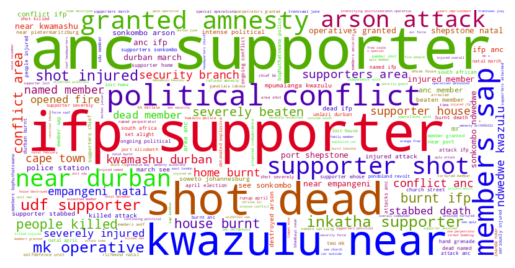

In [ ]:
# creating a wordcloud to visualize results
newtext = " ".join(word_df["word"])
cloud = WordCloud(width = 800, height = 400, background_color = "white", colormap = 'brg').generate(newtext)
plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
counts = word_df["word"].value_counts()[0:10]
counts = counts.reset_index()
counts.head()

,word,count
0,anc,11288
1,supporters,10729
2,shot,8625
3,supporter,8479
4,members,8325


In [ ]:
plot = sns.barplot(data = counts, x = 'index', y = 'word')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

ValueError: Could not interpret value `index` for `x`. An entry with this name does not appear in `data`.

Topic Modeling

In [ ]:
# Import standard data and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the LDA items from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *

In [ ]:
#LDA Topic Modeling
#Creating a pipeline for reducing the data
#max_features = 500. Anything beyond the 500 words will be ignored.
#n_components = 20; making 20 topics

text_pipeline = Pipeline([
     ('tokenize', CountVectorizer(max_features=500, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=20))
    ])

In [ ]:
#pulling individual documents from specified topics

text_pipeline.fit(victims["description"])

# Step 2: Get the topic distribution for each document
doc_topic_distribution = text_pipeline.transform(victims["description"])

# Step 3: Identify documents in a specific topic (e.g., topic 1)
topic_id = 16  # Assuming you want documents from topic 1
docs_in_topic = np.argmax(doc_topic_distribution[:, topic_id])

# Print the documents in topic 1
print(victims["description"][docs_in_topic])

Was shot and injured when her home was attacked by named Inkatha supporters in Ekwazini, Ndwedwe, KwaZulu, near Durban, on 8 July 1990 in intensifying political conflict in the area. Ms Gumede was forced to watch while her son was being burnt to death, and was herself shot because she would not stop screaming. Other family members were injured in the attack, and at least one other person was killed.


In [ ]:
# @title Default title text
topic_id = 2  # Assuming you want documents from topic 1

# Get the document-topic matrix
doc_topic_matrix = text_pipeline.transform(victims["description"])

# Get indices of documents with highest probability for the specified topic
top_docs_indices = np.argsort(doc_topic_matrix[:, topic_id])[::-1]

# Print out the top documents (e.g., top 5)
num_top_docs = 10
for i in range(num_top_docs):
    doc_index = top_docs_indices[i]
    print(f"Document {doc_index + 1} (Topic Probability: {doc_topic_matrix[doc_index, topic_id]}):")
    print(victims["description"][doc_index])
    print()

Document 19908 (Topic Probability: 0.8360374267112116):
A People’s Congress supporter who lost his house in an arson attack by supporters of Chief BK Matlala in GaMatlala, Lebowa, on 2 February 1980 because Mr Thamaga resisted Lebowa’s proposed independence from South Africa. The village was cordoned off and Chief Matlala and his supporters attacked members of the People’s Congress, burnt their houses and stole their livestock. Two people died and about 80 were wounded in the attack.

Document 7589 (Topic Probability: 0.8291320272579379):
A People`s Congress supporter who lost her house and livestock in an arson attack by supporters of Chief BK Matlala in GaMatlala, Lebowa, on 2 February 1980 because Mr Martin resisted Lebowa`s proposed independence from South Africa. Two people died and about 80 were wounded in the attack.

Document 18246 (Topic Probability: 0.8286896214090221):
A People’s Congress supporter who lost her house in an arson attack, allegedly by supporters of Chief Matla

In [ ]:
#Using the Valjean's constant to establish the starting point for LDA
np.random.seed(24601)

text_pipeline.fit_transform(victims["description"]);

In [ ]:
#here are the weights for different words in topics:

word_list = text_pipeline["tokenize"].get_feature_names_out()
topic_num = 1
num_words = 10

df = pd.DataFrame({"words": word_list, "weights": text_pipeline["lda"].components_[topic_num]})

df.sort_values("weights", ascending=False).head(num_words)

,words,weights
132,ciskei,49.747936
266,kwandebele,29.696501
292,members,29.187370
407,shot,28.556854
289,mdantsane,24.534595
348,police,22.415547
69,anc,21.656941
241,injured,21.348461
24,1986,20.377556
161,dead,20.301735


In [ ]:
#getting topics for every document in the dataset
topics = text_pipeline.transform(victims["description"])

In [ ]:
index = 100

victims["description"][index], topics[index]

('Was interrogated, tortured and killed by AZAPO members along with five other scholars in Soweto, Johannesburg, on 1 August 1986. The incident was sparked off by the burning of the house of an AZAPO leader for which the youths were believed to have been responsible. Three perpetrators were refused amnesty, and one was granted amnesty (AC/2000/179 and AC/1999/230).',
 array([0.00940695, 0.00940695, 0.00940695, 0.00940695, 0.00940695,
        0.00940695, 0.00940695, 0.00940695, 0.00940695, 0.00940695,
        0.39097432, 0.00940695, 0.00940695, 0.43970051, 0.00940695,
        0.00940695, 0.00940695, 0.00940695, 0.00940695, 0.00940695]))

In [ ]:
#Visulalizing the topics

def plot_top_words(pipeline, n_top_words=10, grid_shape=[4,5]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

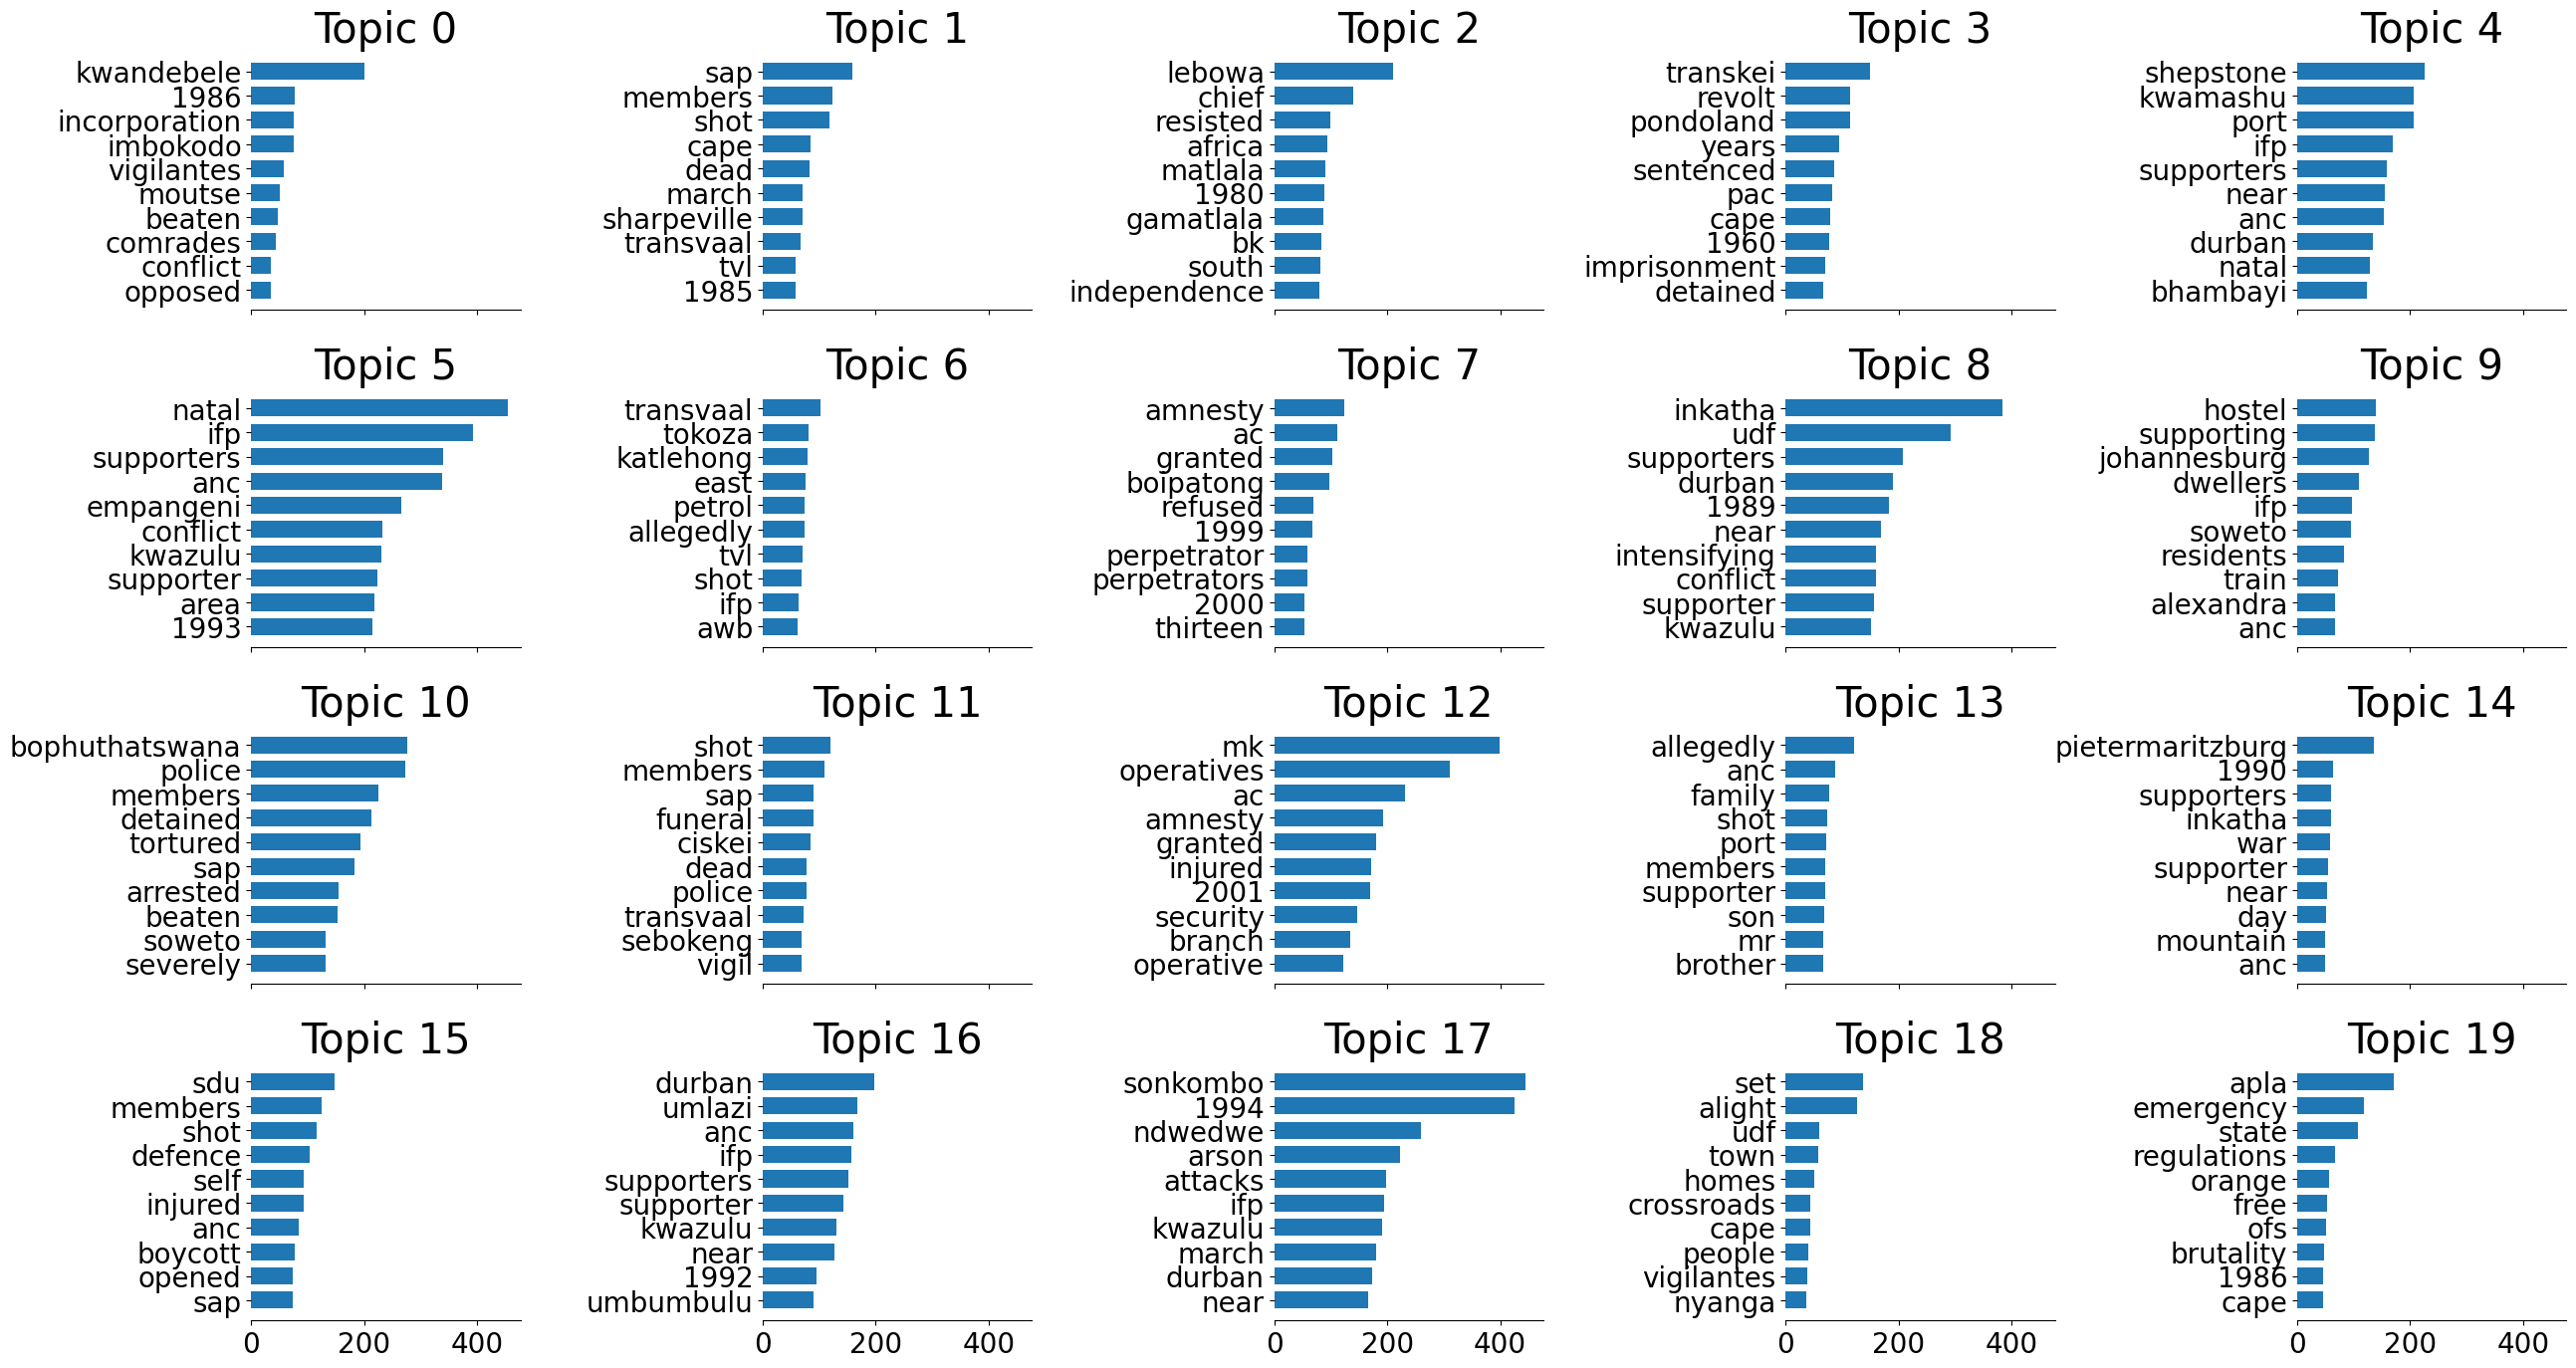

In [ ]:
#Plots the top 10 words in a 5x4 grid
plot_top_words(text_pipeline, 10, [4,5])

Top2Vec

In [ ]:
#Installing Top2Vec
!pip install tf-keras~=2.16
import os
os.environ["TF_USE_LEGACY_KERAS"]="1"
import tf_keras as keras

!pip install top2vec[sentence_encoders]
from top2vec import Top2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 546.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Foun

In [ ]:
victims2 = pd.read_csv("TRC_Victims__20240315.csv")
#loading in dataset

In [ ]:
#Fit a model on the documents

documents = list(victims2["description"])
model = Top2Vec(documents, embedding_model='universal-sentence-encoder', ngram_vocab=True)

In [ ]:
#Top2Vec determining how many topics there should be
model.get_num_topics()

156

In [ ]:
# Determining how many documents are in each topic, numbered from largest to smallest
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes
#Might be useful to do topics that contain 100+ documents in it

array([3069,  954,  568,  446,  414,  405,  390,  369,  330,  328,  327,
        311,  305,  304,  284,  273,  266,  260,  246,  246,  239,  239,
        233,  225,  224,  223,  220,  220,  205,  204,  199,  195,  184,
        184,  178,  177,  171,  164,  159,  159,  158,  157,  149,  145,
        135,  134,  133,  132,  129,  127,  126,  121,  118,  117,  117,
        115,  109,  108,  108,  105,  102,  101,  100,   98,   94,   93,
         93,   91,   90,   90,   88,   87,   86,   86,   85,   85,   84,
         83,   81,   79,   79,   78,   77,   74,   74,   74,   73,   70,
         69,   69,   68,   67,   67,   64,   63,   59,   58,   58,   58,
         57,   57,   56,   56,   55,   53,   52,   52,   51,   50,   50,
         49,   48,   47,   45,   44,   44,   43,   42,   42,   41,   41,
         40,   38,   36,   36,   35,   35,   35,   35,   34,   32,   31,
         31,   29,   28,   27,   26,   26,   26,   25,   25,   25,   25,
         25,   23,   22,   22,   21,   21,   21,   

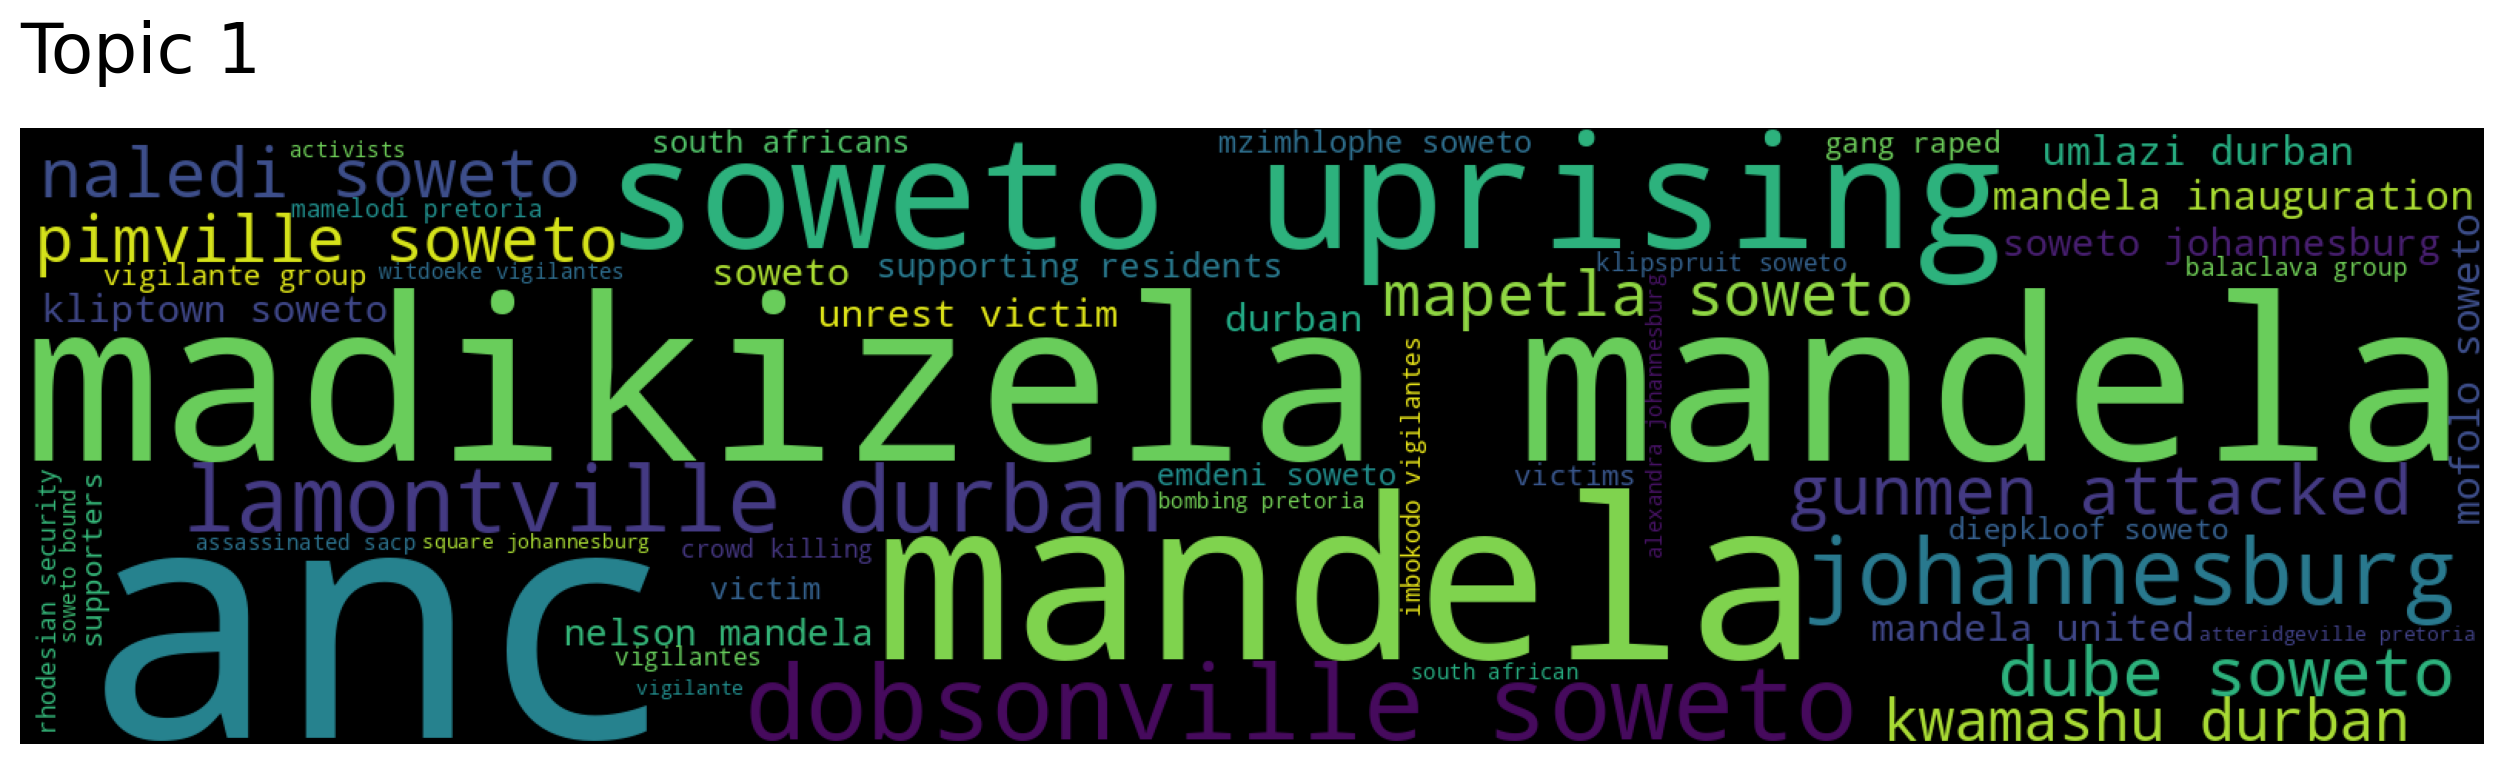

In [ ]:
# Creating a word cloud for topic #1.
model.generate_topic_wordcloud(1)

In [ ]:
#Just printing out the topic words from topic 1
#Might be helpful to use this and experiment with topics 1-20+
topic_words, word_scores, topic_nums = model.get_topics(16)
topic_words[1]

array(['anc', 'madikizela mandela', 'mandela', 'soweto uprising',
       'dobsonville soweto', 'lamontville durban', 'johannesburg',
       'gunmen attacked', 'dube soweto', 'naledi soweto',
       'pimville soweto', 'mapetla soweto', 'kwamashu durban',
       'mandela inauguration', 'mofolo soweto', 'umlazi durban',
       'soweto johannesburg', 'durban', 'soweto', 'mandela united',
       'kliptown soweto', 'unrest victim', 'nelson mandela',
       'supporting residents', 'mzimhlophe soweto', 'victim',
       'south africans', 'emdeni soweto', 'diepkloof soweto',
       'supporters', 'vigilante group', 'victims', 'gang raped',
       'mamelodi pretoria', 'imbokodo vigilantes', 'vigilantes',
       'crowd killing', 'rhodesian security', 'balaclava group',
       'klipspruit soweto', 'witdoeke vigilantes', 'activists',
       'south african', 'bombing pretoria', 'assassinated sacp',
       'soweto bound', 'alexandra johannesburg',
       'atteridgeville pretoria', 'square johannesburg'

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["stoned"], num_topics=5)
#which topic is most similar to "stoned"

In [ ]:
# What are the words most like these topics?
topic_words

[array(['chief mhlabunzima', 'chief leabua', 'chief rule',
        'contralesa chief', 'chief mahlangu', 'rival chiefs',
        'chief mapela', 'chief mankuroane', 'chief lerumo', 'chief',
        'chief molefe', 'chief lebogo', 'severely beaten', 'supporters',
        'appointed chief', 'beaten', 'clashes between', 'against unita',
        'caused violent', 'intense political', 'retaliating against',
        'violence', 'violence erupted', 'leader', 'traditional leaders',
        'chief bk', 'tribal authorities', 'violent labour',
        'severe beatings', 'assaulted', 'politically motivated',
        'heavy police', 'soweto uprising', 'sacp leader',
        'political affiliation', 'activists', 'supporter',
        'violent confrontation', 'dispute between', 'clashes',
        'workers caused', 'student protest', 'train violence', 'against',
        'against high', 'died violently', 'violent', 'eight incidents',
        'summoned chief', 'student protests'], dtype='<U25'),
 array([

In [ ]:
# What topic numbers correspond to that keyword: "Stoned"?
topic_nums

array([101,  56,  52, 141,  64])

In [ ]:
topic_scores
#scores of those topics. They're low

array([0.1039565 , 0.09864333, 0.08137159, 0.07264251, 0.05951009])

In [ ]:
# Find documents with some topic number. This is a good way to explore the topics.
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=7, num_docs=5)
documents

array(['An ANC supporter who was shot and killed by members of the KwaZulu Police during political conflict at KwaMashu, Durban, on 9 May 1993. ',
       'An ANC supporter who was shot dead by members of the KwaZulu Police during political violence in Umlazi, Durban, on 16 January 1992. ',
       'An ANC supporter who was shot dead by members of the KwaZulu Police in Mpumalanga, KwaZulu, near Durban, on 12 November 1989, in intense political conflict. ',
       'An ANC supporter who was shot dead by members of the KwaZulu Police in Umlazi, Durban, on 6 April 1990 during political conflict in the area. ',
       'An ANC supporter who was shot dead by a named member of the KwaZulu Police at Inanda, near KwaMashu, Durban, in October 1989, during political conflict in the area. '],
      dtype=object)

In [ ]:
#Get the topics related to a particular document
topic_nums, topic_scores, topic_words, word_scores = model.get_documents_topics([0], num_topics=5)

#topic_nums is the names of the topics
#topic_scores is the score of how close each topic is to the document
#topic_words are the words associated with those topics